# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

#note conversion for from USD to CAD (Canadian)

In [5]:
# Fetch current BTC price
current_btc = requests.get(btc_url).json()
current_btc = current_btc['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
current_eth = requests.get(eth_url).json()
current_eth = current_eth['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
my_btc_value = current_btc * my_btc
my_eth_value = current_eth * my_eth

crypto_value = my_btc_value + my_eth_value

# Print current crypto wallet balance, *added currently onto the print out
print(f"The current value of your {my_btc} BTC is CAD${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is CAD${my_eth_value:0.2f}")

The current value of your 1.2 BTC is CAD$81866.22
The current value of your 5.3 ETH is CAD$21993.33


In [6]:
#testing current price (in CAD)
current_eth

4149.68407

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Current amount of shares
my_spy = 50
my_agg = 200

#SPY is stocks and AGG is bonds

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [42]:
# Format current date as ISO format (using US time for this example)
today = pd.Timestamp("2021-05-03", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df = alpaca.get_barset(tickers,timeframe,start = today,end = today).df

# Preview DataFrame
df

AGG                                     SPY  \
                            open    high     low  close   volume    open   
time                                                                       
2021-05-03 00:00:00-04:00  114.4  114.59  114.33  114.4  5537985  419.43   

                                                              
                             high      low   close    volume  
time                                                          
2021-05-03 00:00:00-04:00  419.84  417.665  418.18  60955972

In [35]:
# Pick AGG and SPY close prices
spy_close_price = float(df["SPY"]["close"])
agg_close_price = float(df["AGG"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.4
Current SPY closing price: $418.18


In [11]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

shares_value = my_spy_value + my_agg_value

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20909.00
The current value of your 200 AGG shares is $22880.00


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
df_savings = {"crypto": [crypto_value],"shares": [shares_value]}
df_savings = pd.DataFrame(df_savings).transpose()
df_savings.columns = ['amount']

# Display savings DataFrame
display(df_savings)

,amount
crypto,103859.547491
shares,43789.000000


array([<AxesSubplot:ylabel='amount'>], dtype=object)

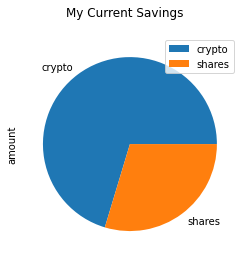

In [13]:
# Plot savings pie chart
df_savings.plot.pie(subplots=True, title = "My Current Savings")

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = shares_value + crypto_value

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations you have enough money in this fund!")
elif total_savings == emergency_fund:
    print("Congratulations on reaching this financial goal!")
else:
    print(f"You are ${emergency_fund - total_savings:.0f} away from reaching your savings goal!")

Congratulations you have enough money in this fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [38]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-05', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-04', tz='America/New_York').isoformat()

In [43]:
# Get 5 years' worth of historical data for SPY and AGG
#60% SPY and 40% AGG - weightings
df_stock_data = alpaca.get_barset(tickers, timeframe, start=start_date, end=end_date, limit=1000,).df

#note limit 1,000 bars per symbol - 252 trading days so approx 4 years data
#from sort index below can see this is the most recent '4 years'

# Display sample data
df_stock_data.head().sort_index()

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2017-05-12 00:00:00-04:00  108.81  108.9400  108.7800  108.92  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.9400  108.8200  108.89  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.1010  108.8800  109.00  1394153.0   
2017-05-17 00:00:00-04:00  109.35  109.6000  109.2800  109.56  2263851.0   
2017-05-18 00:00:00-04:00  109.54  109.6299  109.4433  109.55  1873534.0   

                              SPY                                        
                             open    high     low    close       volume  
time                                                                     
2017-05-12 00:00:00-04:00     NaN     NaN     NaN      NaN          NaN  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245   42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100   37206183.0  
2017-05-17 00:00:00-04:00  238.10  238.64  235.75  235.850  118613594.0  
2017-05-18 00:00:00-04:00  235.70  237.75  235.43  236.670   82965499.0

In [44]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [45]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2017-05-12 00:00:00-04:00  108.81  108.9400  108.7800  108.92  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.9400  108.8200  108.89  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.1010  108.8800  109.00  1394153.0   
2017-05-17 00:00:00-04:00  109.35  109.6000  109.2800  109.56  2263851.0   
2017-05-18 00:00:00-04:00  109.54  109.6299  109.4433  109.55  1873534.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-12 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.64  235.75  235.850   
2017-05-18 00:00:00-04:00    -0.000091  235.70  237.75  235.43  236.670   

                                                     
                                volume daily_return  
time                                                 
2017-05-12 00:00:00-04:00          NaN          NaN  
2017-05-15 00:00:00-04:00   42230620.0          NaN  
2017-05-16 00:00:00-04:00   37206183.0    -0.000604  
2017-05-17 00:00:00-04:00  118613594.0    -0.017701  
2017-05-18 00:00:00-04:00   82965499.0     0.003477

In [46]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006904,1.018435,0.999183,0.995029,1.009955,0.993168,1.003273,0.999477,1.006179,0.997582,...,0.989645,0.988502,1.014579,1.002381,1.001645,1.010005,1.011364,1.004146,1.006947,0.998202
2,1.013724,1.015265,1.000880,0.997430,1.034538,0.994132,0.994866,1.003571,0.997914,1.009266,...,0.991399,0.992991,1.018022,1.006053,0.998094,1.001433,0.996110,0.996853,1.023159,1.002044
3,1.019560,1.015966,1.004583,0.993726,1.035139,0.991366,0.986516,1.009691,0.992677,0.996759,...,1.002186,1.002508,1.012687,1.004491,1.009073,0.983002,1.000612,1.008868,1.021446,1.009450
4,1.018469,1.017337,0.998062,0.988047,1.027421,0.989100,0.984562,1.007086,0.986834,0.993812,...,0.994278,1.009313,1.008613,1.004363,1.017930,0.978663,1.005837,0.991673,1.013731,1.010123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,23.036560,5.612249,7.544378,18.999648,20.977231,31.729962,13.434824,28.895487,20.165724,24.092000,...,13.394478,8.591891,52.133167,4.770903,17.275012,10.996086,17.784857,45.906549,10.029703,7.289392
7557,23.126729,5.631110,7.548294,19.260809,20.980769,32.105680,13.275643,28.830674,19.953196,24.188389,...,13.307707,8.626989,51.530121,4.794898,17.298302,11.059644,17.596034,46.268505,10.099170,7.391516
7558,23.071016,5.557638,7.555149,19.579631,21.053937,32.350642,13.403730,28.586040,20.164024,24.250906,...,13.330016,8.498308,51.430524,4.797366,17.333777,11.182430,17.786969,45.883718,10.286889,7.427930
7559,22.959444,5.480231,7.593958,19.514754,20.831021,32.188076,13.384393,28.502076,20.313736,24.231438,...,13.560750,8.460037,51.665238,4.760879,17.334495,11.158483,17.726537,45.232461,10.414162,7.426367


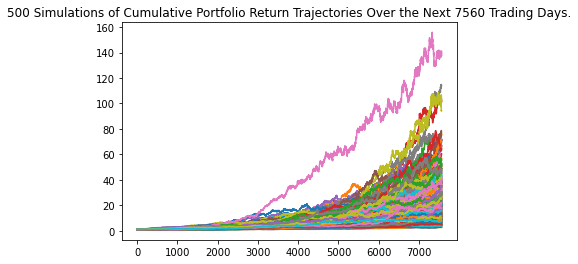

In [47]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

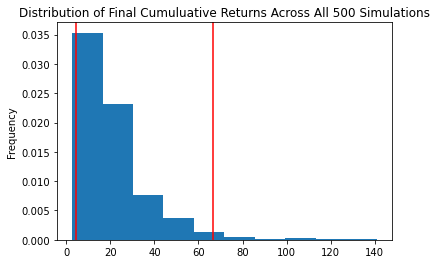

In [48]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [52]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(summary_tbl)

count           500.000000
mean             21.441143
std              16.468799
min               2.643227
25%              10.884935
50%              16.977893
75%              26.372508
max             140.842992
95% CI Lower      4.603564
95% CI Upper     66.590744
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [67]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_tbl[8]*initial_investment,2)
ci_upper = round(summary_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within the range of $92071.29 and $1331814.89


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [71]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_tbl[8]*initial_investment,2)
ci_upper = round(summary_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $138106.93 and $1997722.33


In [70]:
#check initial investment
initial_investment

30000.0

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [92]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
#adjusted to 80% stocks (SPY) to 20% bonds (AGG)
#500 simulations
MC_even_dist_5y = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [93]:
MC_even_dist_5y.portfolio_data.head()

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2017-05-12 00:00:00-04:00  108.81  108.9400  108.7800  108.92  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.9400  108.8200  108.89  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.1010  108.8800  109.00  1394153.0   
2017-05-17 00:00:00-04:00  109.35  109.6000  109.2800  109.56  2263851.0   
2017-05-18 00:00:00-04:00  109.54  109.6299  109.4433  109.55  1873534.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-12 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.64  235.75  235.850   
2017-05-18 00:00:00-04:00    -0.000091  235.70  237.75  235.43  236.670   

                                                     
                                volume daily_return  
time                                                 
2017-05-12 00:00:00-04:00          NaN          NaN  
2017-05-15 00:00:00-04:00   42230620.0          NaN  
2017-05-16 00:00:00-04:00   37206183.0    -0.000604  
2017-05-17 00:00:00-04:00  118613594.0    -0.017701  
2017-05-18 00:00:00-04:00   82965499.0     0.003477

In [94]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_5y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993629,1.016108,1.019036,0.995658,1.020727,0.988292,1.005373,0.997781,0.990334,0.998859,...,0.993261,1.019392,1.000751,1.019448,0.988007,1.016334,0.982249,1.000462,0.998090,0.999383
2,0.985888,0.991013,1.016598,1.003707,1.014835,0.989504,1.025398,0.997975,1.003764,1.003715,...,1.010436,1.010571,0.986146,1.044224,0.991827,1.016134,0.978308,0.990555,1.003859,1.010974
3,1.000553,0.988714,1.025485,1.000906,1.012692,0.975836,1.011890,1.001954,1.006242,1.001357,...,1.029667,1.007038,0.996637,1.050607,0.991583,1.015638,0.980921,0.979054,1.015704,1.034820
4,1.007871,1.007557,1.033652,0.991656,1.026611,0.972888,1.006283,1.002579,1.014858,1.019123,...,1.031715,1.004747,0.994953,1.043439,0.999709,1.005017,0.995958,0.979070,1.036326,1.027785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.750220,0.849071,2.390990,1.924822,1.110205,1.576004,2.617530,2.156721,1.300122,2.149562,...,0.794935,1.948932,2.112756,2.481062,1.683596,1.867273,5.882641,2.629527,1.717019,1.837554
1257,1.750806,0.846140,2.378854,1.907520,1.119552,1.569560,2.624294,2.155126,1.322209,2.163294,...,0.794920,1.915366,2.121661,2.491890,1.700469,1.853449,5.881935,2.617933,1.735301,1.825408
1258,1.750278,0.830069,2.377293,1.921102,1.127988,1.592443,2.610251,2.143397,1.335061,2.139194,...,0.794407,1.942762,2.132439,2.495445,1.698087,1.846800,5.965832,2.668572,1.702397,1.811338
1259,1.742522,0.826378,2.368042,1.905649,1.127373,1.577419,2.607830,2.120867,1.306368,2.140871,...,0.805464,1.916092,2.126759,2.526955,1.702475,1.863987,5.963515,2.663235,1.697857,1.805266


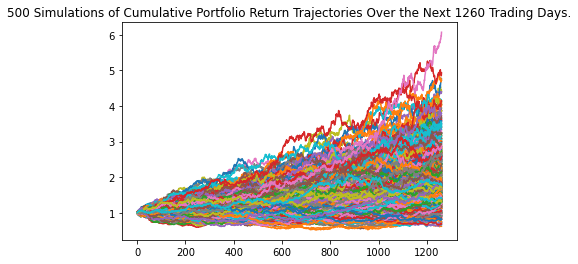

In [95]:
# Plot simulation outcomes
line_plot = MC_even_dist_5y.plot_simulation()

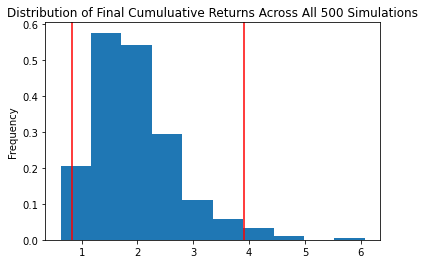

In [96]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist_5y.plot_distribution()

In [97]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_tbl_5y = MC_even_dist_5y.summarize_cumulative_return()

# Print summary statistics
print(summary_tbl_5y)

count           500.000000
mean              1.959643
std               0.769741
min               0.622356
25%               1.428269
50%               1.803539
75%               2.356300
max               6.072030
95% CI Lower      0.830529
95% CI Upper      3.904178
Name: 1260, dtype: float64


In [98]:
# Set initial investment
initial_investment_5y = 30000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary_tbl_5y[8]*initial_investment_5y,2)
ci_upper_five = round(summary_tbl_5y[9]*initial_investment_5y,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $24915.88 and $117125.35


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997817,0.998428,1.000816,1.000202,1.002120,0.998788,1.004226,1.004250,1.001431,1.000740,...,0.995519,1.001253,1.000492,0.994026,1.006129,1.002356,1.005233,0.999769,1.002106,1.003746
2,0.994703,0.996223,1.001987,0.998816,1.002372,0.996708,1.009074,1.006986,1.006219,0.995591,...,0.991815,1.001091,1.003774,0.989341,1.007530,1.009809,1.007273,0.999666,1.006340,0.998303
3,0.994115,0.993375,0.992622,1.001069,0.999700,1.000123,1.011610,1.009254,1.012194,0.998619,...,0.992699,1.003085,1.005997,0.991536,1.004239,1.010765,1.009501,0.999652,1.011737,0.998762
4,0.999040,0.997821,0.992272,0.999767,1.000459,1.006178,1.008906,1.009897,1.014282,0.995619,...,0.997683,1.007825,1.007858,0.991188,1.009171,1.009303,1.008223,1.003270,1.014350,1.001691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.164254,1.246948,1.441080,1.685210,1.702114,1.474774,1.535126,1.288182,1.138653,1.500977,...,1.367442,1.357662,1.661583,1.348599,1.649220,1.782632,1.450872,1.701338,1.199957,1.171159
2517,2.169555,1.246315,1.436260,1.685058,1.697652,1.479128,1.536203,1.288485,1.144082,1.498097,...,1.366833,1.360457,1.672969,1.351751,1.646287,1.781356,1.459438,1.695322,1.197466,1.171882
2518,2.169089,1.243387,1.426446,1.685480,1.714264,1.479079,1.537777,1.289258,1.140795,1.496271,...,1.368088,1.357853,1.662915,1.354957,1.637911,1.781046,1.451367,1.695901,1.201111,1.172847
2519,2.170695,1.238881,1.419187,1.670521,1.720418,1.478161,1.544292,1.296500,1.137510,1.499085,...,1.370125,1.359697,1.664317,1.352170,1.633762,1.778638,1.443413,1.699061,1.191529,1.166331


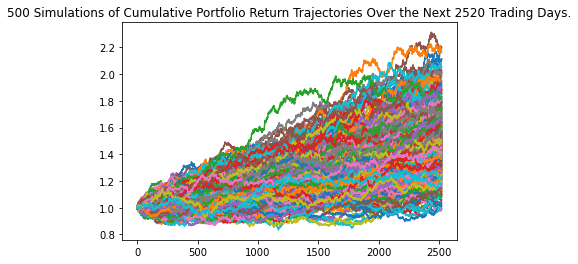

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!

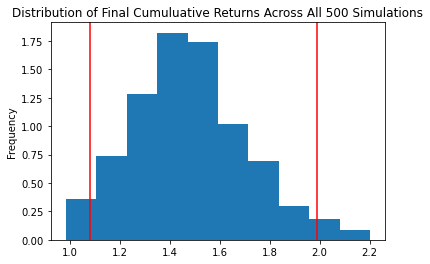

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.477364
std               0.230147
min               0.984413
25%               1.319127
50%               1.468676
75%               1.613270
max               2.202006
95% CI Lower      1.083048
95% CI Upper      1.990417
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $64982.9 and $119425.0
